# Decision Tree Regression

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time

## Importing the dataset

In [2]:
dataset = pd.read_csv('WF_data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

##Splitting the dataset into the Training set and Test set

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.01, random_state = 0)

## Training the Decision Tree Regression model on the whole dataset

In [4]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
start_train = time.time()
regressor.fit(X_train, y_train)
end_train = time.time()

##Predicting the Test set results

In [5]:
row1 = [1., 1., 2., 0.1, 0., 9.2062,	-4.8659]
X_t = np.array([row1])
print(X_t)

regressor.predict(X_t)

[[ 1.      1.      2.      0.1     0.      9.2062 -4.8659]]


array([0.5510573])

In [6]:
start_pred = time.time()
y_pred = regressor.predict(X_test)
end_pred = time.time()

## Plot

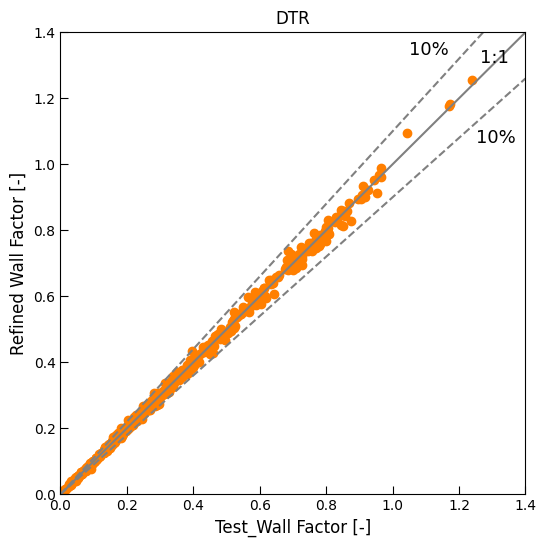

In [7]:
import matplotlib.pyplot as plt


# Set the font to Helvetica (widely available)
plt.rcParams['font.family'] = 'Helvetica'

# Stronger Orange for 20% Deviation Lines
strong_orange = '#FF7F00'  # A brighter, stronger orange

plt.figure(figsize=(6, 6))
plt.plot([0., 1.4], [0., 1.4], 'grey')
plt.plot([0, 1.4], [0*1.1, 1.4*1.1], 'grey', linestyle='dashed')
plt.plot([0, 1.4], [0*0.9, 1.4*0.9], 'grey', linestyle='dashed')

# Annotating "20%" on the deviation lines
plt.text(1.17, 1.2 * 1.1, "10%", color='k', fontsize=13, ha='right', va='bottom')
plt.text(1.37, 1.23 * 0.9, "10%", color='k', fontsize=13, ha='right', va='top')
plt.text(1.35, 1.35, "1:1", color='k', fontsize=13, ha='right', va='top')

# **Set fixed axis limits**
plt.xlim(0, 1.4)  # Fix x-axis range from 0 to 1.5
plt.ylim(0, 1.4)  # Fix y-axis range from 0 to 1.5

# Create scatter plot
plt.scatter(y_test, y_pred, color=strong_orange, marker='o')

# Labels and title
plt.xlabel("Test_Wall Factor [-]", fontsize=12,)
plt.ylabel("Refined Wall Factor [-]", fontsize=12)
plt.title("DTR", fontsize=12)

plt.tick_params(axis='both', direction='in', length=6)
# Show plot

plt.show()

## ML models metrics

In [8]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2}")

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse}")

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

R-squared (R²): 0.9981288271145841
Root Mean Squared Error (RMSE): 0.011031989363141134
Mean Squared Error: 0.00012170478930845914
Mean Absolute Error (MAE): 0.0076039738993963785


In [9]:
import time

# Measure training time
training_time = end_train - start_train

# Measure prediction time
prediction_time = end_pred - start_pred

print(f"Training Time: {training_time:.5f} seconds")
print(f"Prediction Time: {prediction_time:.5f} seconds")

Training Time: 0.15150 seconds
Prediction Time: 0.00131 seconds
